In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ast import literal_eval
import time
import requests

In [113]:
# Import the dataset
data = pd.read_csv('http://fantasyoverlord.com/FPL/DataWithForecasts',encoding='iso8859_2')
data.index = range(1, data.shape[0] + 1)
data.head(10)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,GW29Forecast,GW30Forecast,GW31Forecast,GW32Forecast,GW33Forecast,GW34Forecast,GW35Forecast,GW36Forecast,GW37Forecast,GW38Forecast
1,NaN,A.Armstrong,FWD,SOU,5500000,4,5,2.5,4.545455e-07,9.090909e-07,...,1.9,1.2,3.5,1.2,1.5,1.2,1.2,1.4,1.2,3.5
2,NaN,A.Doucoure,MID,EVE,5500000,1,3,1.5,2.727273e-07,5.454545e-07,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3,Brenden,Aaronson,MID,LEE,5500000,1,3,1.5,2.727273e-07,5.454545e-07,...,0.8,1.1,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
4,NaN,Adama,MID,WOL,5500000,1,1,1.0,1.818182e-07,1.818182e-07,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
5,Che,Adams,FWD,SOU,6400000,2,2,2.0,3.125000e-07,3.125000e-07,...,1.3,1.0,2.8,1.0,1.0,1.0,1.0,1.0,1.0,2.8
6,Tyler,Adams,MID,LEE,5000000,2,3,1.5,3.000000e-07,6.000000e-07,...,0.8,1.1,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8
7,NaN,Adrian,GLK,LIV,4000000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Nayef,Aguerd,DEF,WHU,4900000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Rayan,Ait-Nouri,DEF,WOL,4500000,6,5,2.5,5.555556e-07,1.111111e-06,...,1.2,2.8,1.2,1.2,3.5,1.5,1.2,2.9,3.5,1.2
10,Kristoffer,Ajer,DEF,BRE,4500000,0,0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
#Top players untile this GW [Total]
data.sort_values(by=['TotalPoints'],ascending=False)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
448,NaN,Rodrigo,MID,LEE,6100000,15,22,22.0,3.606557e-06,3.606557e-06,...,382402,1,0,72,Southampton,Chelsea,Brighton,Everton,Brentford F.C.,13.9776
256,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.9000
135,Kevin,De Bruyne,MID,MCI,12000000,14,20,10.0,8.333333e-07,1.666667e-06,...,136609,0,0,70,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.2000
476,Fabian,Schar,DEF,NEW,4600000,5,20,10.0,2.173913e-06,4.347826e-06,...,99149,0,0,65,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,12.4000
216,Pascal,Gro?,MID,BHA,5600000,3,18,9.0,1.607143e-06,3.214286e-06,...,91420,0,0,51,Newcastle,West Ham,Leeds United F.C.,Fulham,Leicester,9.9000
223,Erling,Haaland,FWD,MCI,11700000,5,18,9.0,7.692308e-07,1.538462e-06,...,93981,1,0,64,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,11.0000
87,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.4000
458,NaN,Sa,GLK,WOL,5000000,15,17,8.5,1.700000e-06,3.400000e-06,...,21610,0,0,60,Fulham,Tottenham,Newcastle,Bournemouth,Southampton,10.5000
230,Dean,Henderson,GLK,NFO,4500000,14,17,8.5,1.888889e-06,3.777778e-06,...,42321,0,0,69,West Ham,Everton,Tottenham,Man City,Bournemouth,12.1000
530,Ivan,Toney,FWD,BRE,7000000,9,17,8.5,1.214286e-06,2.428571e-06,...,110356,0,0,57,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,12.1000


In [115]:
#Top palyer in the last GW
data.sort_values(by=['PointsLastRound'],ascending=False)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
256,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.9000
448,NaN,Rodrigo,MID,LEE,6100000,15,22,22.0,3.606557e-06,3.606557e-06,...,382402,1,0,72,Southampton,Chelsea,Brighton,Everton,Brentford F.C.,13.9776
458,NaN,Sa,GLK,WOL,5000000,15,17,8.5,1.700000e-06,3.400000e-06,...,21610,0,0,60,Fulham,Tottenham,Newcastle,Bournemouth,Southampton,10.5000
349,Ben,Mee,DEF,BRE,4500000,14,14,7.0,1.555556e-06,3.111111e-06,...,77912,0,0,41,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,9.9000
135,Kevin,De Bruyne,MID,MCI,12000000,14,20,10.0,8.333333e-07,1.666667e-06,...,136609,0,0,70,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.2000
255,Mathias,Jensen,MID,BRE,5000000,14,15,7.5,1.500000e-06,3.000000e-06,...,70987,0,0,48,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,9.5000
230,Dean,Henderson,GLK,NFO,4500000,14,17,8.5,1.888889e-06,3.777778e-06,...,42321,0,0,69,West Ham,Everton,Tottenham,Man City,Bournemouth,12.1000
576,Granit,Xhaka,MID,ARS,5000000,12,14,7.0,1.400000e-06,2.800000e-06,...,51066,0,0,47,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,7.1000
87,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.4000
561,Ollie,Watkins,FWD,AVL,7400000,11,12,6.0,8.108108e-07,1.621622e-06,...,22377,0,0,30,Everton,Crystal Palace,West Ham,Arsenal,Man City,7.9000


In [116]:
data[data.PositionsList == 'GLK'].sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[['FirstName','Surname',data.columns[(data.columns.get_indexer(['NextFixture5'])+1)[0]]]].head(20)

,FirstName,Surname,GW2Forecast
0,Dean,Henderson,12.1
1,NaN,Sa,10.5
2,Nick,Pope,9.1
3,NaN,Ederson,8.0
4,NaN,Raya,6.4
5,Robert,Sanchez,5.5
6,Marek,Rodak,4.3
7,Edouard,Mendy,3.8
8,Aaron,Ramsdale,2.8
9,NaN,Martinez,2.8


In [117]:
cols = ['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost','PointsLastRound']

In [118]:
cols

['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost', 'PointsLastRound']

In [119]:
#How much a player’s price has increased since the start of the season
cols.append('PriceRise')
data.sort_values(by=['PriceRise'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceRise')

In [120]:
# How much a player’s price has increased this Gameweek.
cols.append('PriceRiseRound')
data.sort_values(by=['PriceRiseRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceRiseRound')

In [121]:
#How much a player’s price has decreased since the start of the season
cols.append('PriceFall')
data.sort_values(by=['PriceFall'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceFall')

In [122]:
# How much a player’s price has decreased this Gameweek.
cols.append('PriceFallRound')
data.sort_values(by=['PriceFallRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('PriceFallRound')

In [123]:
#Top Transfers Out this round
cols.append('TransfersOutRound')
data.sort_values(by=['TransfersOutRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('TransfersOutRound')

In [124]:
#Top Transfers In this round
cols.append('TransfersInRound')
data.sort_values(by=['TransfersInRound'],ascending=False,ignore_index=True)[cols].head(50)
cols.remove('TransfersInRound')

In [125]:
data.columns

Index(['FirstName', 'Surname', 'PositionsList', 'Team', 'Cost',
       'PointsLastRound', 'TotalPoints', 'AveragePoints',
       'AveragePointsPerDollar', 'TotalPointsPerDollar', 'GameweekWeighting',
       'TransfersOut', 'YellowCards', 'GoalsConceded', 'GoalsConcededPoints',
       'Saves', 'SavesPoints', 'GoalsScored', 'GoalsScoredPoints',
       'ValueSeason', 'TransfersOutRound', 'PriceRise', 'PriceFallRound',
       'LastSeasonPoints', 'PriceFall', 'ValueForm', 'PenaltiesMissed', 'Form',
       'Bonus', 'FanRating', 'CleanSheets', 'CleanSheetPoints', 'Assists',
       'SelectedByPercent', 'TransfersIn', 'OwnGoals', 'EAIndex',
       'PenaltiesSaved', 'DreamteamCount', 'MinutesPlayed', 'TransfersInRound',
       'PriceRiseRound', 'RedCards', 'BPS', 'NextFixture1', 'NextFixture2',
       'NextFixture3', 'NextFixture4', 'NextFixture5', 'GW2Forecast',
       'GW3Forecast', 'GW4Forecast', 'GW5Forecast', 'GW6Forecast',
       'GW7Forecast', 'GW8Forecast', 'GW9Forecast', 'GW10Forecast',

In [126]:
#Top selected Plyers
data.sort_values(by=['SelectedByPercent'],ascending=False,ignore_index=True)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)
#data.index = range(1, data.shape[0] + 1)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.90
1,Mohamed,Salah,MID,LIV,13000000,0,12,12.0,9.230769e-07,9.230769e-07,...,46341,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.60
2,Erling,Haaland,FWD,MCI,11700000,5,18,9.0,7.692308e-07,1.538462e-06,...,93981,1,0,64,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,11.00
3,Trent,Alexander-Arnold,DEF,LIV,7500000,0,1,1.0,1.333333e-07,1.333333e-07,...,23460,0,0,13,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,1.10
4,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.40
5,Reece,James,DEF,CHE,6000000,7,14,7.0,1.166667e-06,2.333333e-06,...,111677,0,0,62,Tottenham,Leeds United F.C.,Leicester,Southampton,West Ham,8.50
6,NaN,Martinelli,MID,ARS,6200000,8,16,8.0,1.290323e-06,2.580645e-06,...,492892,1,0,53,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,8.70
7,NaN,N.Williams,DEF,NFO,4000000,7,7,3.5,8.750000e-07,1.750000e-06,...,78928,0,0,34,West Ham,Everton,Tottenham,Man City,Bournemouth,4.40
8,Danny,Ward,GLK,LEI,4000000,1,2,1.0,2.500000e-07,5.000000e-07,...,59860,0,0,23,Arsenal,Southampton,Chelsea,Man Utd,Brighton,0.50
9,Oleksandr,Zinchenko,DEF,ARS,5100000,1,13,6.5,1.274510e-06,2.549020e-06,...,134457,0,0,53,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,7.20


In [127]:
# Forcasting
data.sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].head(50)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,NaN,Jesus,FWD,ARS,8000000,19,21,10.5,1.312500e-06,2.625000e-06,...,263271,0,0,72,Leicester,Bournemouth,Fulham,Aston Villa,Man Utd,14.9000
1,NaN,Rodrigo,MID,LEE,6100000,15,22,22.0,3.606557e-06,3.606557e-06,...,382402,1,0,72,Southampton,Chelsea,Brighton,Everton,Brentford F.C.,13.9776
2,Mohamed,Salah,MID,LIV,13000000,0,12,12.0,9.230769e-07,9.230769e-07,...,46341,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.6000
3,NaN,Darwin,FWD,LIV,9100000,0,9,9.0,9.890110e-07,9.890110e-07,...,66481,0,0,31,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,12.8000
4,Josh,Dasilva,MID,BRE,4600000,8,14,14.0,3.043478e-06,3.043478e-06,...,294968,1,0,48,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,12.7360
5,Phil,Foden,MID,MCI,8000000,9,12,12.0,1.500000e-06,1.500000e-06,...,80560,0,0,49,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.5600
6,Joao,Cancelo,DEF,MCI,7000000,11,18,9.0,1.285714e-06,2.571429e-06,...,97467,0,0,63,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.4000
7,Fabian,Schar,DEF,NEW,4600000,5,20,10.0,2.173913e-06,4.347826e-06,...,99149,0,0,65,Brighton,Man City,Wolverhampton,Liverpool,Crystal Palace,12.4000
8,Kevin,De Bruyne,MID,MCI,12000000,14,20,10.0,8.333333e-07,1.666667e-06,...,136609,0,0,70,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,12.2000
9,Ivan,Toney,FWD,BRE,7000000,9,17,8.5,1.214286e-06,2.428571e-06,...,110356,0,0,57,Man Utd,Fulham,Everton,Crystal Palace,Leeds United F.C.,12.1000


In [128]:
# Get data for selected players
data[data['Surname'].isin(['Salah','Haaland'])][data.columns[:(data.columns.get_indexer(['NextFixture5'])+2)[0]]].reset_index(drop=True)

,FirstName,Surname,PositionsList,Team,Cost,PointsLastRound,TotalPoints,AveragePoints,AveragePointsPerDollar,TotalPointsPerDollar,...,TransfersInRound,PriceRiseRound,RedCards,BPS,NextFixture1,NextFixture2,NextFixture3,NextFixture4,NextFixture5,GW2Forecast
0,Erling,Haaland,FWD,MCI,11700000,5,18,9.0,7.692308e-07,1.538462e-06,...,93981,1,0,64,Bournemouth,Newcastle,Crystal Palace,Nottingham Forest FC,Aston Villa,11.0
1,Mohamed,Salah,MID,LIV,13000000,0,12,12.0,9.230769e-07,9.230769e-07,...,46341,0,0,34,Crystal Palace,Man Utd,Bournemouth,Newcastle,Everton,13.6


In [129]:
data[data.PositionsList == 'GLK'].sort_values(by=[data.columns[(data.columns.get_indexer(['NextFixture5'])+1)][0]],ascending=False,ignore_index=True)[['FirstName','Surname',data.columns[(data.columns.get_indexer(['NextFixture5'])+1)[0]]]].head(20)

,FirstName,Surname,GW2Forecast
0,Dean,Henderson,12.1
1,NaN,Sa,10.5
2,Nick,Pope,9.1
3,NaN,Ederson,8.0
4,NaN,Raya,6.4
5,Robert,Sanchez,5.5
6,Marek,Rodak,4.3
7,Edouard,Mendy,3.8
8,Aaron,Ramsdale,2.8
9,NaN,Martinez,2.8


# Read data from FPL API

In [3]:
# data_git = pd.read_csv('https://github.com/vaastav/Fantasy-Premier-League/raw/master/data/cleaned_merged_seasons.csv',index_col=False)
# data_git.columns

c:\Users\loain\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unnamed: 0', 'season_x', 'name', 'position', 'team_x', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')

# Work with FPL API data

In [3]:
# Import data from FPL API

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
url_fix = 'https://fantasy.premierleague.com/api/fixtures/?future=1'
r_fixture = requests.get(url_fix)
fixture_json = r_fixture.json()
r = requests.get(url)
data_json = r.json()
print(data_json.keys())

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])


In [4]:
elements_df = pd.DataFrame(data_json['elements'])
elements_types_df = pd.DataFrame(data_json['element_types'])
teams_df = pd.DataFrame(data_json['teams'])
fixture_df = pd.DataFrame(fixture_json)

In [382]:
fixture_df.iloc[:10]

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2292838,3,False,False,29,2022-08-20T11:30:00Z,0,False,False,20,None,18,None,[],2,4,74939
1,2292831,3,False,False,22,2022-08-20T14:00:00Z,0,False,False,2,None,7,None,[],2,2,74932
2,2292832,3,False,False,23,2022-08-20T14:00:00Z,0,False,False,16,None,8,None,[],2,2,74933
3,2292833,3,False,False,24,2022-08-20T14:00:00Z,0,False,False,4,None,9,None,[],2,2,74934
4,2292835,3,False,False,26,2022-08-20T14:00:00Z,0,False,False,17,None,10,None,[],2,4,74936
5,2292830,3,False,False,21,2022-08-20T16:30:00Z,0,False,False,1,None,3,None,[],3,2,74931
6,2292834,3,False,False,25,2022-08-21T13:00:00Z,0,False,False,6,None,11,None,[],4,2,74935
7,2292839,3,False,False,30,2022-08-21T13:00:00Z,0,False,False,5,None,19,None,[],2,3,74940
8,2292837,3,False,False,28,2022-08-21T15:30:00Z,0,False,False,13,None,15,None,[],5,3,74938
9,2292836,3,False,False,27,2022-08-22T19:00:00Z,0,False,False,12,None,14,None,[],5,4,74937


In [413]:
h_name = teams_df['name'][teams_df['id'] == fixture_df['team_h'].iloc[0]].values[0]
a_name = teams_df['name'][teams_df['id'] == fixture_df['team_a'].iloc[0]].values[0]

In [386]:
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1270,1150,1210,1190,1220,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1090,1100,1140,1110,1090,1090,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1050,1050,1080,1130,1060,1100,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1090,1100,1120,1150,1080,1120,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1090,1160,1160,1100,1120,131
5,8,0,None,6,0,Chelsea,0,0,0,CHE,...,None,False,0,1270,1280,1300,1300,1250,1290,4
6,31,0,None,7,0,Crystal Palace,0,0,0,CRY,...,None,False,0,1090,1100,1110,1160,1080,1160,6
7,11,0,None,8,0,Everton,0,0,0,EVE,...,None,False,0,1050,1100,1130,1090,1110,1110,7
8,54,0,None,9,0,Fulham,0,0,0,FUL,...,None,False,0,1040,1060,1090,1040,1120,1070,34
9,13,0,None,10,0,Leicester,0,0,0,LEI,...,None,False,0,1110,1240,1100,1080,1150,1160,26


In [ ]:
import plotly.graph_objects as go
for i in range(len(fixture_df.iloc[:10])):
    labels = ['Overall','Attack','Defence']
    
    h_name = teams_df['name'][teams_df['id'] == fixture_df['team_h'].iloc[i]].values[0]
    a_name = teams_df['name'][teams_df['id'] == fixture_df['team_a'].iloc[i]].values[0]
    
    h = [teams_df['strength_overall_home'][teams_df['id'] == fixture_df.team_h.iloc[i]].values[0],
    teams_df['strength_attack_home'][teams_df['id'] == fixture_df.team_h.iloc[i]].values[0],teams_df['strength_defence_home'][teams_df['id'] == fixture_df.team_h.iloc[i]].values[0]]

    a = [teams_df['strength_overall_away'][teams_df['id'] == fixture_df.team_a.iloc[i]].values[0],
    teams_df['strength_attack_away'][teams_df['id'] == fixture_df.team_a.iloc[i]].values[0],teams_df['strength_defence_away'][teams_df['id'] == fixture_df.team_a.iloc[i]].values[0]]

    fig = go.Figure(data=[
        go.Bar(name=h_name, x=labels, y=h),
        go.Bar(name=a_name, x=labels, y=a)
    ])
    # Change the bar mode
    fig.update_layout(barmode='group')
    fig.show()

In [132]:
elements_df.head()
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [5]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','event_points','total_points','dreamteam_count','form','transfers_in_event', 'transfers_out', 'transfers_out_event','value_form','goals_scored',
'assists', 'clean_sheets', 'goals_conceded', 'own_goals','penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards','saves', 'bonus', 'bps','ict_index']]
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
#slim_elements_df = slim_elements_df.loc[slim_elements_df.value >= 0]
slim_elements_df.head(10)

C:\Users\loain\AppData\Local\Temp\ipykernel_6088\1256876862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
C:\Users\loain\AppData\Local\Temp\ipykernel_6088\1256876862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
C:\Users\loain\AppData\Local\Temp\ipykernel_6088\1256876862.py:5: SettingWithCopyWarning: 

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,event_points,total_points,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,ict_index,position,value
0,Alves Soares,Arsenal,2,0.2,43,0,2302,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Defender,0.0
1,Xhaka,Arsenal,3,2.4,50,267,159430,4.0,6,20,...,0,0,1,0,0,2,72,19.3,Midfielder,4.0
2,Elneny,Arsenal,3,1.4,44,0,69009,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Midfielder,0.0
3,Holding,Arsenal,2,0.1,44,0,1359,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Defender,0.0
4,Partey,Arsenal,3,0.7,50,270,22136,1.6,3,8,...,0,0,0,0,0,0,39,11.2,Midfielder,1.6
5,Ødegaard,Arsenal,3,11.6,64,253,171581,3.3,16,21,...,0,0,0,0,0,3,75,19.2,Midfielder,3.3
6,Tierney,Arsenal,2,1.0,49,22,8373,0.6,1,3,...,0,0,0,0,0,0,9,0.8,Defender,0.6
7,Pépé,Arsenal,3,0.3,53,0,4538,0.0,0,0,...,0,0,0,0,0,0,0,0.0,Midfielder,0.0
8,White,Arsenal,2,5.7,45,238,66527,2.9,7,13,...,0,0,1,0,0,1,62,8.8,Defender,2.9
9,Nketiah,Arsenal,4,0.5,68,29,6888,0.4,1,3,...,0,0,0,0,0,0,4,6.6,Forward,0.4


In [135]:
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
mid_df.sort_values('transfers_in',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,event_points,total_points,...,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,ict_index,position,value
17,Martinelli Silva,Arsenal,3,33.4,62,180,1009870,2.6,8,16,...,0,0,0,0,0,1,53,20.1,Midfielder,2.6
519,Kulusevski,Spurs,3,13.5,81,175,569697,1.9,2,15,...,0,0,0,0,0,3,50,15.9,Midfielder,1.9
292,Moreno,Leeds,3,7.2,61,154,509864,3.6,15,22,...,0,0,0,0,0,3,72,28.5,Midfielder,3.6
89,Dasilva,Brentford,3,7.1,46,92,505229,3.0,8,14,...,0,0,0,0,0,0,48,9.3,Midfielder,3.0
117,Groß,Brighton,3,5.6,56,180,392223,3.2,3,18,...,0,0,0,0,0,3,51,24.1,Midfielder,3.2
354,De Bruyne,Man City,3,19.1,120,177,321799,1.7,14,20,...,0,0,0,0,0,3,70,27.9,Midfielder,1.7
329,Salah,Liverpool,3,62.5,130,180,233115,1.1,2,14,...,0,0,0,0,0,2,39,23.1,Midfielder,1.1
253,Hoelgebaum Pereira,Fulham,3,24.4,45,173,219524,1.1,3,5,...,0,0,0,0,0,0,11,6.4,Midfielder,1.1
478,Ward-Prowse,Southampton,3,10.9,65,180,214452,1.7,2,11,...,0,0,0,0,0,2,41,14.3,Midfielder,1.7
147,Frello Filho,Chelsea,3,4.7,60,162,193172,2.2,2,13,...,0,0,0,0,0,3,48,12.2,Midfielder,2.2


In [7]:
# Get id for top # in the overall legue
def top_users(num):
    l =int(num / 50)
    lege_df = pd.DataFrame()
    for i in range(1,l):
        leg_url = 'https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings='+str(i)
        r_lege = requests.get(leg_url)
        lege_json = r_lege.json()
        lege_df = lege_df.append(pd.DataFrame(lege_json['standings']['results']),ignore_index=True)
    return lege_df

In [8]:
top_100 = top_users(100)
top_100

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,21760144,116,Jamie Wilce,1,11262,1,209,3633274,In Jesus We Trust
1,3739054,117,Ethan Bryant,2,65794,2,203,721791,5backmerchant
2,43962372,95,Kevin Harre,3,197,3,201,6209589,Satan’s Barnacles
3,51933925,126,Cheong Man Wong,4,1071637,4,198,7174695,itecnewman
4,34187254,96,Jonathan Muyimba,5,778,5,198,5244462,HT/FT
5,18490470,105,Phil Mwendwa,5,11262,6,198,3157768,ifike mid-ssn nchoke
6,47967852,93,محمد عزاالدين بشير🇸🇩,7,384,7,197,6708542,فخر الزيداب
7,6260241,116,ABIUD Makokha,8,205450,8,197,1185887,ENOUGH IS ENOUGH.
8,41069983,97,Abdullah Ar,9,1926,9,196,5888567,Rm FC
9,21614396,124,Matt Gillow,9,1071637,10,196,3611550,Crass of ‘92


In [9]:
def top_picks(user_id):
    players = []
    for i in user_id:
        pick_url = 'https://fantasy.premierleague.com/api/entry/'+str(i)+'/event/2/picks/'
        rr = requests.get(pick_url)
        pick_json = rr.json()
        p_df = pd.DataFrame(pick_json['picks'])
        p_df['element'] = p_df.element.map(elements_df.set_index('id').second_name)
        for j in range(15):
            players.append(p_df['element'].values[j])
    df_playesr = pd.DataFrame([players])
    return df_playesr

In [302]:
pk_100 = top_picks(top_100['entry'])
ply_val = dict(pk_100.T.value_counts(normalize=True)*100)

In [370]:
ply_df = pd.DataFrame(data=ply_val,index=[0])
ply_df.T

,0
Fernando de Jesus,6.266667
Martinelli Silva,4.800000
James,4.533333
Cancelo,4.266667
Salah,4.133333
...,...
Jansson,0.133333
Højbjerg,0.133333
Heung-min,0.133333
Guéhi,0.133333


In [274]:
# Find the captin in the pick
def get_captain(user_id):
    cap_list = []
    for i in user_id:
        pick_url = 'https://fantasy.premierleague.com/api/entry/'+str(i)+'/event/2/picks/'
        rr = requests.get(pick_url)
        pick_json = rr.json()
        pick_json.keys()
        p_df = pd.DataFrame(pick_json['picks'])
        p_df['element'] = p_df.element.map(elements_df.set_index('id').second_name)
        cap_list.append(p_df['element'][p_df['is_captain'] == True].values[0])
    return cap_list

In [275]:
captin_1k = get_captain(top_100['entry'])

In [276]:
cap_df = pd.DataFrame(captin_1k)

In [277]:
cap_df.value_counts()

Fernando de Jesus    26
De Bruyne            13
Haaland               9
Cancelo               1
Salah                 1
dtype: int64

# Build the Model for Forcasting

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [41]:
data_git.columns

Index(['Unnamed: 0', 'season_x', 'name', 'position', 'team_x', 'assists',
       'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture',
       'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [82]:
features = ['name', 'position', 'opp_team_name', 'selected', 'transfers_in', 'transfers_out','was_home','GW']

lab_y = ['assists','bonus', 'clean_sheets','goals_conceded', 'goals_scored', 'ict_index', 'minutes','own_goals', 'penalties_missed','penalties_saved',
'red_cards', 'saves','yellow_cards','total_points']

x_data = data_git.drop(columns=list(set(data_git.columns) - set(features)))
y_data = data_git.drop(columns=list(set(data_git.columns) - set(lab_y)))

In [85]:
for i in range(len(x_data)):
    if x_data['was_home'].iloc[i] == False:
        x_data['was_home'].iloc[i] = 0
    else:
        x_data['was_home'].iloc[i] = 1

c:\Users\loain\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [92]:
le_ply_name = LabelEncoder()
le_ply_name.fit(x_data['name'])
x_data['name'] = le_ply_name.transform(x_data['name'])

le_op_t_name = LabelEncoder()
le_op_t_name.fit(x_data['opp_team_name'])
x_data['opp_team_name'] = le_op_t_name.transform(x_data['opp_team_name'])

le_ply_pos = LabelEncoder()
le_ply_pos.fit(x_data['position'])
x_data['position'] = le_ply_pos.transform(x_data['position'])

x_data

,name,position,opp_team_name,selected,transfers_in,transfers_out,was_home,GW
0,1,0,7,14023,0,0,0,1
1,2,3,23,13918,0,0,1,1
2,5,3,15,163170,0,0,1,1
3,7,3,22,1051,0,0,0,1
4,11,3,24,2723,0,0,1,1
...,...,...,...,...,...,...,...,...
98397,957,3,22,70366,22,224,1,38
98398,636,0,5,15999,396,253,0,38
98399,696,3,14,13856,683,228,0,38
98400,628,2,29,587,0,2,1,38


In [45]:
slim_elements_df
data_git[data_git['name'] == 'Mohamed Salah' ]

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
8295,8295,2017-18,Mohamed Salah,MID,NaN,1,1,26,0,2.8,...,3.0,55.0,11,0,0,0,90,False,0,1
8562,8562,2017-18,Mohamed Salah,MID,NaN,1,0,5,1,16.9,...,3.0,57.0,4,210999,246328,35329,92,True,0,10
8834,8834,2017-18,Mohamed Salah,MID,NaN,0,3,48,0,37.6,...,1.0,59.0,15,79912,118529,38617,93,False,0,11
9108,9108,2017-18,Mohamed Salah,MID,NaN,0,3,40,1,27.3,...,3.0,66.0,16,280935,291072,10137,95,True,0,12
9382,9382,2017-18,Mohamed Salah,MID,NaN,0,0,23,0,26.7,...,1.0,88.0,7,116541,153845,37304,96,True,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95633,95633,2021-22,Mohamed Salah,MID,Liverpool,1,0,15,1,30.9,...,2.0,26.0,6,126558,161746,35188,132,True,0,34
96375,96375,2021-22,Mohamed Salah,MID,Liverpool,0,0,1,0,11.8,...,0.0,23.0,1,66469,95352,28883,133,False,0,35
96786,96786,2021-22,Mohamed Salah,MID,Liverpool,0,0,4,0,24.8,...,1.0,58.0,2,-18428,58868,77296,133,True,0,36
96787,96787,2021-22,Mohamed Salah,MID,Liverpool,0,0,2,0,11.0,...,1.0,26.0,1,-18428,58868,77296,133,False,0,36


In [93]:
X = slim_elements_df.drop(columns=['second_name','team','event_points','position'])
Y = slim_elements_df['event_points']
x_trn,x_ts,y_trn,y_ts = train_test_split(x_data,y_data,test_size=0.20)

In [94]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_trn,y_trn)
y_pred = model.predict(x_ts)
print('MSE -> ',mean_squared_error(y_ts,y_pred))
print('MAE -> ',mean_absolute_error(y_ts,y_pred))

MSE ->  126.86298119288365
MAE ->  2.0859197050091822


In [139]:
y_po = []
for i in range(len(y_pred)):
    y_po.append(y_pred[i][-1])

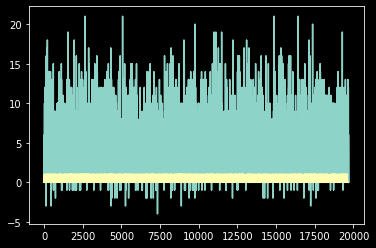

In [145]:
plt.plot(list(y_ts['total_points']))
plt.plot(y_po)
